In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import Perceptron as Perceptron 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [62]:
data = pd.read_csv('inputs1.txt', sep = ", ", header = 0)
inputs_tested = data[data["PCT"]==True]
inputs_untested = data[data["PCT"]==False]
colors={True:'red', False: 'blue'}
print(data)

       PCT  Input Time  Input Duration  Input Pressure  \
0    False       0.585           0.030           0.075   
1    False       0.737           0.066           0.100   
2    False       0.919           0.046           0.140   
3    False       1.069           0.080           0.135   
4     True       1.736           0.063           0.075   
..     ...         ...             ...             ...   
309   True     125.875           0.081           0.155   
310   True     126.044           0.094           0.190   
311   True     126.250           0.066           0.165   
312   True     126.433           0.065           0.135   
313  False     127.032           0.055           0.075   

     Time Since Previous Input  Acceleration  
0                        0.585     10.115442  
1                        0.122      9.588084  
2                        0.116      9.976874  
3                        0.104      9.759528  
4                        0.587      9.736554  
..                   

C:\Users\imjro\AppData\Local\Temp\ipykernel_9280\2393368064.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('inputs1.txt', sep = ", ", header = 0)


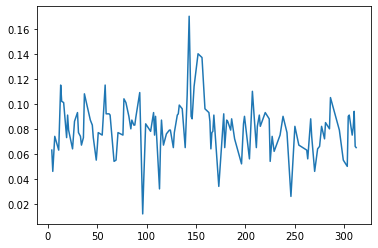

Mean of tested duration:  0.07955303030691785
Standard deviation of tested duration:  0.020752748154512345


In [63]:
inputs_tested['Input Duration'].plot()
plt.show()
print("Mean of tested duration: ", inputs_tested['Input Duration'].mean())
print("Standard deviation of tested duration: ", inputs_tested['Input Duration'].std())

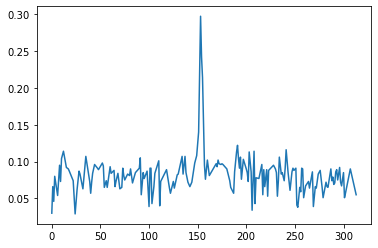

Mean of untested duration:  0.08236813187473811
Standard deviation of untested duration:  0.029269969826023454


In [64]:
inputs_untested['Input Duration'].plot()
plt.show()
print("Mean of untested duration: ", inputs_untested['Input Duration'].mean())
print("Standard deviation of untested duration: ", inputs_untested['Input Duration'].std())

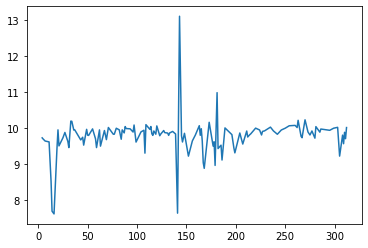

Mean of tested acceleration:  9.782427279865217
Standard deviation of etsted acceleration:  0.5201148299366424


In [65]:
inputs_tested['Acceleration'].plot()
plt.show()
print("Mean of tested acceleration: ", inputs_tested['Acceleration'].mean())
print("Standard deviation of etsted acceleration: ", inputs_tested['Acceleration'].std())

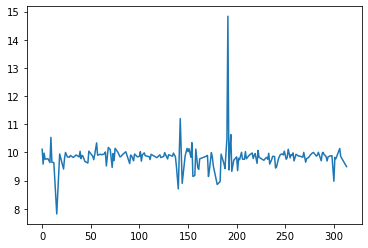

Mean of untested acceleration:  9.837555122975882
Standard deviation of untested acceleration:  0.49491938317761547


In [66]:
inputs_untested['Acceleration'].plot()
plt.show()
print("Mean of untested acceleration: ", inputs_untested['Acceleration'].mean())
print("Standard deviation of untested acceleration: ", inputs_untested['Acceleration'].std())

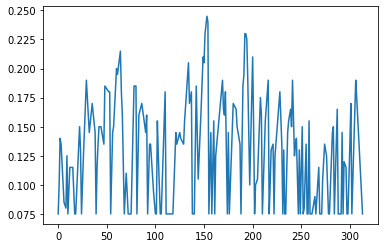

Mean of untested pressure:  0.1283791163465479
Standard deviation of untested pressure:  0.046421491722884727


In [68]:
inputs_untested['Input Pressure'].plot()
plt.show()
print("Mean of untested pressure: ", inputs_untested['Input Pressure'].mean())
print("Standard deviation of untested pressure: ", inputs_untested['Input Pressure'].std())

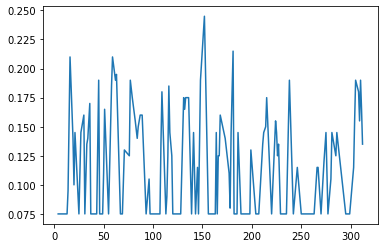

Mean of tested pressure:  0.12041666268399268
Standard deviation of tested pressure:  0.0441200724816754


In [69]:
inputs_tested['Input Pressure'].plot()
plt.show()
print("Mean of tested pressure: ", inputs_tested['Input Pressure'].mean())
print("Standard deviation of tested pressure: ", inputs_tested['Input Pressure'].std())

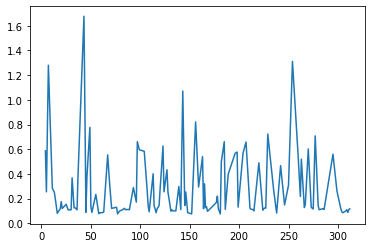

Mean:  0.2719015151466892
Standard Deviation:  0.26962283126947784


In [72]:
inputs_tested['Time Since Previous Input'].plot()
plt.show()
print("Mean: ", inputs_tested['Time Since Previous Input'].mean())
print("Standard Deviation: ", inputs_tested['Time Since Previous Input'].std())

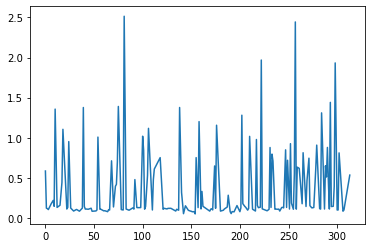

Mean:  0.3610109890053806
Standard Deviation:  0.45252601023176653


In [73]:
inputs_untested['Time Since Previous Input'].plot()
plt.show()
print("Mean: ", inputs_untested['Time Since Previous Input'].mean())
print("Standard Deviation: ", inputs_untested['Time Since Previous Input'].std())

plot time between inputs related to time(colour code based on value of 'tested')

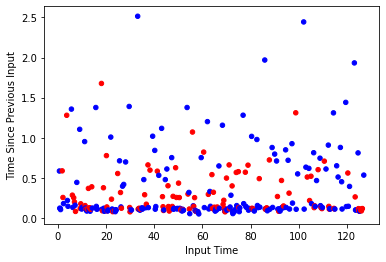

In [74]:
data.plot(kind = 'scatter', x = 'Input Time', y = 'Time Since Previous Input', c = data.PCT.map(colors))
plt.show()

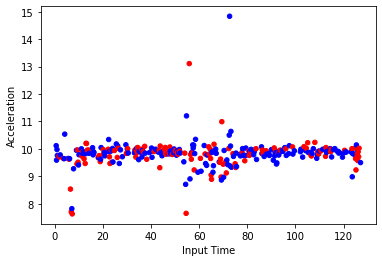

In [76]:
data.plot(kind = 'scatter', x = 'Input Time', y = 'Acceleration', c = data.PCT.map(colors))
plt.show()

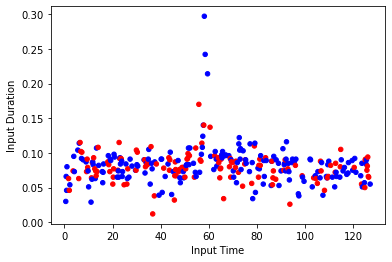

In [77]:
data.plot(kind = 'scatter', x = 'Input Time', y = 'Input Duration', c = data.PCT.map(colors))
plt.show()

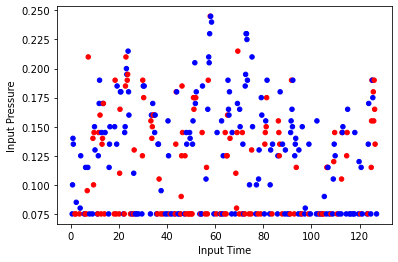

In [78]:
data.plot(kind = 'scatter', x = 'Input Time', y = 'Input Pressure', c = data.PCT.map(colors))
plt.show()

In [79]:
X = data.iloc[:,2:5].values 
y = data.iloc[:,0].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [81]:
ppn = Perceptron()
ppn.fit(X_train, y_train)
X_pred = ppn.predict(X_test)

print("Accuracy score: ", accuracy_score(y_test, X_pred))

Accuracy score:  0.5769230769230769


C:\Users\imjro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


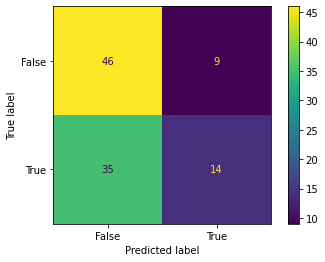

In [82]:
plot_confusion_matrix(ppn, X_test, y_test)
plt.show()